# `Group Project` - Boston 2017 Bike Sharing Analysis

## Introduction
In this project we will work with real world data from "Blue Bikes" which is a bike sharing firm based in Boston.

Our focus lies on data of the year 2017 and we will make a comprehensive analysis, in which we use typical data analysis and machine learning approaches to make use of the data to monitize and optimize the operations of "Blue Bikes". The overall topic is smart mobility systems and how we can use data in impactful ways to address pressing societal issues. In terms of bike sharing the addressed societal issue are the reduce of greenhouse gas emissions, reduce of pollution as health risk for urban population, reduce of (fatal) road accidents and to create a more efficient road transport infrastructur. We will cover the following task:

- **Task 1) Data Collection & Preparation**: 
    * Cleaning of datasets for use in later analysis stages
- **Task 2) Descriptive Analysis**: 
    * Demonstrate temporal demand patterns and seasonality
    * Demonstrate geographical demand patterns 
    * Define Key Performance Indicators which provides overview of current fleet operations
- **Task 3) Predictive Analysis**:
    * Forecast total system-level demand in the next hour

**The authors of this analysis are:**
* Robin Kirch      (7364580)
* Niklas Nesseler  (7367375)
* Lukas Tempfli    (7367097)
* Pascal Zajonz    (7369974)
* Sven Dornbrach   (7364484)
* Moritz Danhausen (7369413)


Hint: Please run the seperated cells from the top to the bottom

### Required Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime 
from datetime import timedelta 
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")
#import etc


# `Task 1) Data Collection & Preparation:`

### Details to Task 1
#TODO
Detailed introduction to task 1 here

In [2]:
raw_data_boston = pd.read_csv("boston_2017.csv")
#Problematisch bei gleicher Startzeit und ggbf. kompletten Dateipfad angeben notwendig

In [3]:

raw_data_boston["start_time"]=pd.to_datetime(raw_data_boston["start_time"])
raw_data_boston["end_time"]=pd.to_datetime(raw_data_boston["end_time"])
raw_data_boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [4]:
raw_data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313774 entries, 0 to 1313773
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1313774 non-null  datetime64[ns]
 1   end_time            1313774 non-null  datetime64[ns]
 2   start_station_id    1313774 non-null  int64         
 3   end_station_id      1313774 non-null  int64         
 4   start_station_name  1313774 non-null  object        
 5   end_station_name    1313774 non-null  object        
 6   bike_id             1313774 non-null  int64         
 7   user_type           1313774 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 80.2+ MB


In [5]:
raw_data_boston.describe()

,start_station_id,end_station_id,bike_id
count,1.313774e+06,1.313774e+06,1.313774e+06
mean,8.571053e+01,8.554360e+01,9.931371e+02
std,5.634766e+01,5.648317e+01,5.701397e+02
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.300000e+01,4.300000e+01,5.160000e+02
50%,7.400000e+01,7.400000e+01,9.780000e+02
75%,1.170000e+02,1.170000e+02,1.512000e+03
max,2.320000e+02,2.320000e+02,1.981000e+03


In [6]:
raw_data_boston.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type'],
      dtype='object')

In [7]:
raw_data_boston["end_time"].describe()
#start_time nicht zugreifbar

<ipython-input-7-0a5c0f10cd4b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data_boston["end_time"].describe()


count                 1313774
unique                1245112
top       2017-06-27 17:27:42
freq                        6
first     2017-01-01 00:12:49
last      2018-01-07 20:00:16
Name: end_time, dtype: object

In [8]:
raw_data_boston["start_station_id"].describe()

count    1.313774e+06
mean     8.571053e+01
std      5.634766e+01
min      1.000000e+00
25%      4.300000e+01
50%      7.400000e+01
75%      1.170000e+02
max      2.320000e+02
Name: start_station_id, dtype: float64

In [9]:
raw_data_boston["end_station_id"].describe()

count    1.313774e+06
mean     8.554360e+01
std      5.648317e+01
min      1.000000e+00
25%      4.300000e+01
50%      7.400000e+01
75%      1.170000e+02
max      2.320000e+02
Name: end_station_id, dtype: float64

In [10]:
raw_data_boston["start_station_name"].describe()

count                          1313774
unique                             285
top       MIT at Mass Ave / Amherst St
freq                             42320
Name: start_station_name, dtype: object

In [11]:
raw_data_boston["end_station_name"].describe()

count                          1313774
unique                             283
top       MIT at Mass Ave / Amherst St
freq                             42442
Name: end_station_name, dtype: object

In [12]:
raw_data_boston["bike_id"].describe()

count    1.313774e+06
mean     9.931371e+02
std      5.701397e+02
min      1.000000e+00
25%      5.160000e+02
50%      9.780000e+02
75%      1.512000e+03
max      1.981000e+03
Name: bike_id, dtype: float64

In [13]:
raw_data_boston["user_type"].describe()

count        1313774
unique             2
top       Subscriber
freq         1104738
Name: user_type, dtype: object

In [14]:
raw_data_boston.count()

start_time            1313774
end_time              1313774
start_station_id      1313774
end_station_id        1313774
start_station_name    1313774
end_station_name      1313774
bike_id               1313774
user_type             1313774
dtype: int64

In [15]:
raw_data_weather= pd.read_csv("weather_hourly_boston.csv")
raw_data_weather["date_time"]=pd.to_datetime(raw_data_weather["date_time"])

In [16]:
raw_data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [17]:
raw_data_weather.head(20)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0
3,2015-01-02 04:00:00,-0.6,-0.6,0.0
4,2015-01-02 05:00:00,-0.6,-0.6,0.0
5,2015-01-01 06:00:00,-5.6,-5.6,0.0
6,2015-01-01 07:00:00,-5.6,-5.6,0.0
7,2015-01-01 08:00:00,-5.6,-5.6,0.0
8,2015-01-01 09:00:00,-4.4,-4.4,0.0
9,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [18]:
first_date =datetime(year=2017,day=1,month=1)
lastdate=datetime(year=2017, day=31,month =12)

neu_weather_2017= raw_data_weather[(raw_data_weather["date_time"]>=first_date)&(raw_data_weather["date_time"]<=lastdate)]
neu_weather_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 17520 to 26279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8667 non-null   datetime64[ns]
 1   max_temp   8667 non-null   float64       
 2   min_temp   8667 non-null   float64       
 3   precip     8667 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 338.6 KB


In [19]:
bike_list = raw_data_boston["bike_id"].unique()
fleet_size = len(bike_list)
fleet_size


1799

In [20]:
def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour
def set1 (ts):
    return 1

In [21]:
raw_data_boston["Date"] = raw_data_boston["start_time"].apply(lambda ts: get_date (ts))
raw_data_boston["Rented"]=raw_data_boston["Date"].apply(lambda ts: set1(ts))
raw_data_boston.head(50)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Date,Rented
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,2017-01-01,1
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,2017-01-01,1
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,2017-01-01,1
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,2017-01-01,1
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,2017-01-01,1
5,2017-01-01 00:30:40,2017-01-01 00:41:45,47,195,Cross St. at Hanover St.,Brian P. Murphy Staircase at Child Street,1918,Subscriber,2017-01-01,1
6,2017-01-01 00:42:04,2017-01-01 00:46:25,67,179,MIT at Mass Ave / Amherst St,MIT Vassar St,1102,Subscriber,2017-01-01,1
7,2017-01-01 00:43:59,2017-01-01 00:50:42,107,179,Ames St at Main St,MIT Vassar St,1060,Subscriber,2017-01-01,1
8,2017-01-01 00:47:49,2017-01-01 00:58:32,58,33,The Esplanade - Beacon St. at Arlington St.,Kenmore Sq / Comm Ave,1613,Subscriber,2017-01-01,1
9,2017-01-01 00:48:37,2017-01-01 01:04:31,9,15,Agganis Arena - 925 Comm Ave.,Harvard Real Estate - Brighton Mills - 370 Wes...,980,Customer,2017-01-01,1


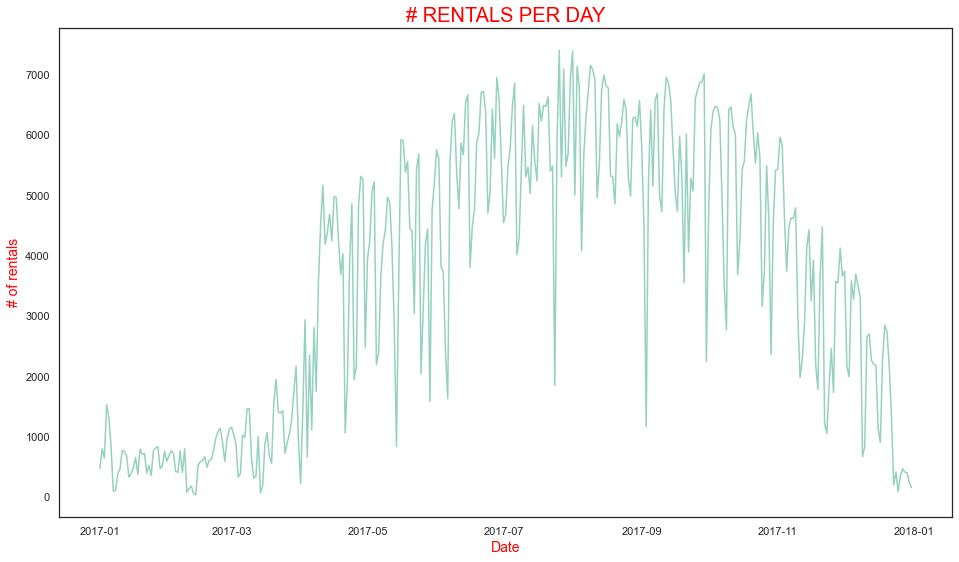

In [44]:
bikes_rented_total = raw_data_boston.groupby("Date")["Rented"].sum()
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(bikes_rented_total)

ax.set_title("# RENTALS PER DAY", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()

Plot für die Anzahl der ausgeliehenen Fahrräder in Relation zu der Temperatur (Lukas)

In [39]:
#connecting both data sets by  the date with an inner join

left=raw_data_boston
right=neu_weather_2017


inner_merge = pd.merge(left=left, right=right, left_on="start_time", right_on="date_time")

inner_merge

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Date,Rented,Weekday,date_time,max_temp,min_temp,precip
0,2017-01-01 03:00:00,2017-01-01 03:03:45,67,178,MIT at Mass Ave / Amherst St,MIT Pacific St at Purrington St,972,Subscriber,2017-01-01,1,6,2017-01-01 03:00:00,5.0,5.0,1.0
1,2017-01-01 12:00:00,2017-01-01 12:04:27,131,27,Jackson Square T at Centre St,Roxbury Crossing Station,310,Subscriber,2017-01-01,1,6,2017-01-01 12:00:00,2.2,2.2,0.0
2,2017-01-11 14:00:00,2017-01-11 14:04:04,179,67,MIT Vassar St,MIT at Mass Ave / Amherst St,1625,Subscriber,2017-01-11,1,2,2017-01-11 14:00:00,8.9,8.9,0.0
3,2017-01-20 18:00:00,2017-01-20 18:06:24,90,91,Lechmere Station at Cambridge St / First St,One Kendall Square at Hampshire St / Portland St,1665,Subscriber,2017-01-20,1,4,2017-01-20 18:00:00,3.9,3.9,0.0
4,2017-01-23 11:00:00,2017-01-23 11:06:11,179,67,MIT Vassar St,MIT at Mass Ave / Amherst St,1030,Subscriber,2017-01-23,1,0,2017-01-23 11:00:00,2.2,2.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2017-12-16 23:00:00,2017-12-16 23:15:54,69,33,Coolidge Corner - Beacon St @ Centre St,Kenmore Square,1640,Subscriber,2017-12-16,1,5,2017-12-16 23:00:00,-1.1,-1.1,0.0
394,2017-12-18 22:00:00,2017-12-18 22:02:22,178,179,MIT Pacific St at Purrington St,MIT Vassar St,158,Subscriber,2017-12-18,1,0,2017-12-18 22:00:00,1.1,1.1,0.0
395,2017-12-19 08:00:00,2017-12-19 08:27:11,193,90,Brookline Village - Station Street @ MBTA TEMP...,Lechmere Station at Cambridge St / First St,743,Subscriber,2017-12-19,1,1,2017-12-19 08:00:00,2.2,2.2,0.0
396,2017-12-20 17:00:00,2017-12-20 17:09:30,228,47,One Memorial Drive,Cross St at Hanover St,1616,Subscriber,2017-12-20,1,2,2017-12-20 17:00:00,5.6,5.6,0.0


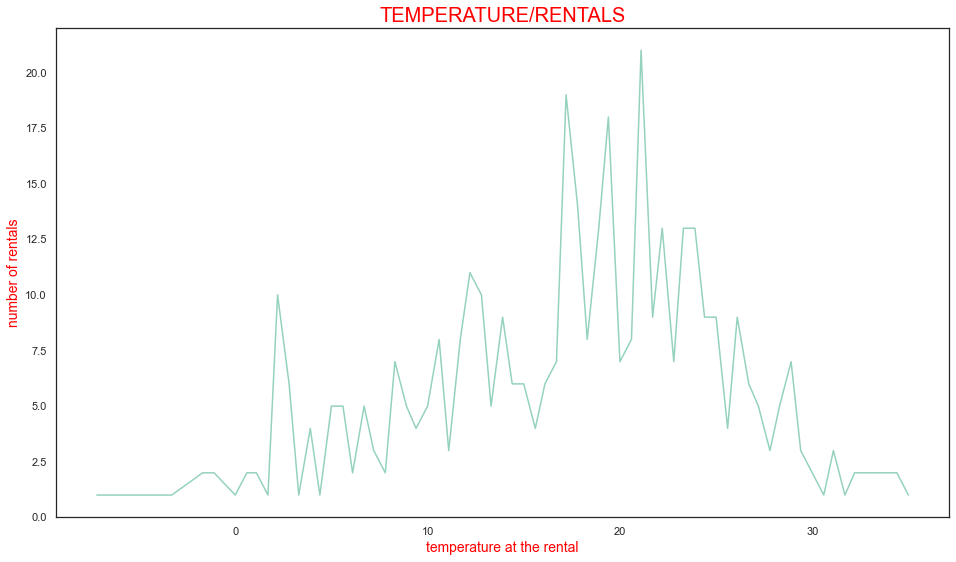

In [50]:

weather_rentals=inner_merge.groupby("min_temp")["Rented"].sum()

Fig_2, ax_2= plt.subplots(figsize=(16,9))

ax_2.plot(weather_rentals)

ax_2.set_title("TEMPERATURE/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_2.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_2.set_xlabel("temperature at the rental", fontsize = 14, color = "red")

plt.show()





Plot für die Anzahl der ausgeliehenen Fahrräder an den jeweiligen Wochentag (Lukas)

In [51]:
#add the weekday to the data

raw_data_boston["Weekday"] = raw_data_boston["start_time"].apply(lambda ts: get_weekday (ts))

<function matplotlib.pyplot.show(close=None, block=None)>

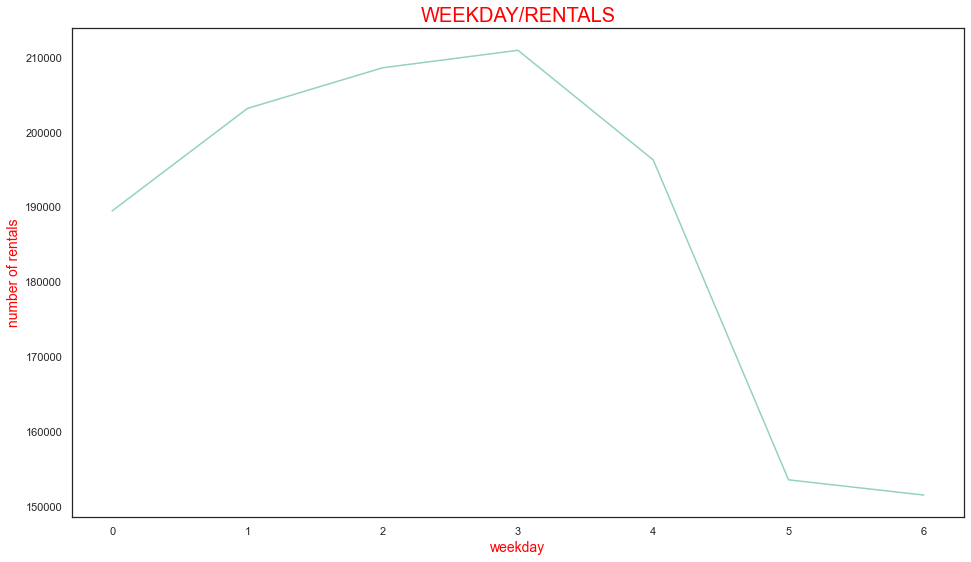

In [65]:
weekday_rentals=raw_data_boston.groupby("Weekday")["Rented"].sum()
Fig_3, ax_3= plt.subplots(figsize=(16,9))

ax_3.plot(weekday_rentals)

ax_3.set_title("WEEKDAY/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("weekday", fontsize = 14, color = "red")


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

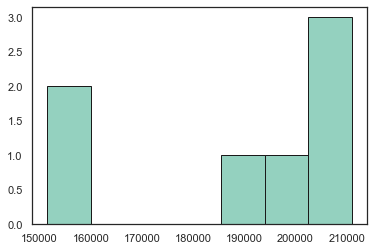

In [68]:
# Ansatz Barplot, da diskrete Werte (Kein Tag 1.4)
# Wahrscheinlich Seaborn nutzen

weekday_rentals=raw_data_boston.groupby("Weekday")["Rented"].sum()

Fig_3, ax_3, gg= plt.hist(weekday_rentals, bins = 7, edgecolor = 'k')

plt.show



Plot zur Beliebtheit einzelner Stationen (Lukas)

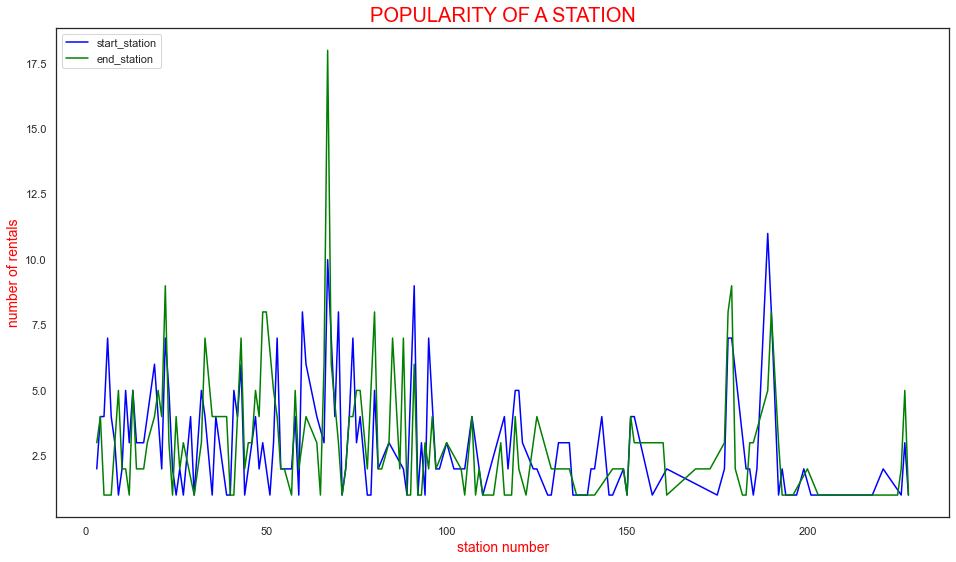

In [73]:
start_station_rentals=inner_merge.groupby("start_station_id")["Rented"].sum()
end_station_rentals=inner_merge.groupby("end_station_id")["Rented"].sum()


Fig_4, ax_4= plt.subplots(figsize=(16,9))

ax_4.plot(start_station_rentals, label="start_station", color = "blue")
ax_4.plot(end_station_rentals , label="end_station", color = "green")

ax_4.set_title("POPULARITY OF A STATION", fontsize = 20, fontname = "arial", color = "red")
ax_4.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_4.set_xlabel("station number", fontsize = 14, color = "red")


plt.legend(loc="upper left")




# `Task 2) Descriptive Analysis:`

### Details to Task 2
#TODO
Detailed introduction to task 2 here

# `Task 3) Descriptive Analysis:`

### Details to Task 3
#TODO
Detailed introduction to task 3 here